## MNIST Classification Using **Dense** Layers

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, utils, models, layers, optimizers, losses
import numpy as np
import matplotlib.pyplot as plt

Data Preparation

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
print("train_images dimentions: ", train_images.ndim)
print("train_images shape: ", train_images.shape)

11501568/11490434 [==============================] - 0s 0us/step
train_images dimentions:  3
train_images shape:  (60000, 28, 28)


In [3]:
# Preprocessing

X_train = train_images.reshape(60000, 784)
X_test = test_images.reshape(10000, 784)

# Normalizing (0-1)
X_train = X_train.astype('float32') / 255
X_test =  X_test.astype('float32') / 255

Y_train = utils.to_categorical(train_labels)
Y_test = utils.to_categorical(test_labels)

print(train_labels[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


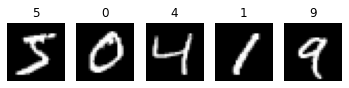

In [4]:
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')

Model Creation

In [5]:
myModel = models.Sequential()
myModel.add(layers.Dense(500, activation='relu', input_shape=(784,)))
myModel.add(layers.Dropout(0.2))
myModel.add(layers.Dense(100, activation='relu'))
myModel.add(layers.Dropout(0.2))
myModel.add(layers.Dense(10, activation='softmax'))

myModel.summary()
myModel.compile(optimizer=optimizers.SGD(lr=0.001), loss=losses.categorical_crossentropy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Training

In [17]:
# Callbacks
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import ModelCheckpoint

logger = CSVLogger('log.txt')
checkpoint = ModelCheckpoint('model_chk.h5', save_best_only=True)

callbacks_list = [logger, checkpoint]

# Train our model
history = myModel.fit(X_train, Y_train, batch_size=128,
                      epochs=20, validation_split=0.2,
                      callbacks = callbacks_list)

Epoch 1/20
375/375 [==============================] - 3s 9ms/step - loss: 0.5550 - val_loss: 0.4133
Epoch 2/20
375/375 [==============================] - 2s 7ms/step - loss: 0.5451 - val_loss: 0.4042
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.5352 - val_loss: 0.3959
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.5251 - val_loss: 0.3882
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.5128 - val_loss: 0.3812
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.5052 - val_loss: 0.3748
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4955 - val_loss: 0.3686
Epoch 8/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4890 - val_loss: 0.3631
Epoch 9/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4821 - val_loss: 0.3576
Epoch 10/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4738 - val_loss: 0.3528

## Save Model

In [7]:
myModel.save("my_model.h5")

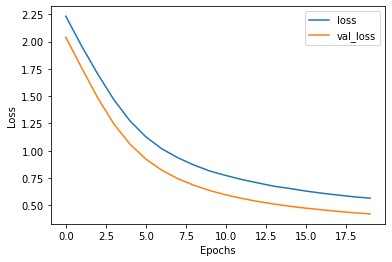

In [ ]:
losses = history.history['loss']
val_losses = history.history['val_loss']

plt.plot(losses)
plt.plot(val_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])

## Load Model

In [18]:
from keras.models import load_model

loaded_model = load_model('model_chk.h5')

loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.utils import plot_model

plot_model(loaded_model, to_file='my_model.pdf', show_shapes=True)

In [20]:
# Evaluation
test_loss = loaded_model.evaluate(X_test, Y_test)
print("test loss: ", test_loss)

test_labels_p = loaded_model.predict(X_test)
test_labels_p = np.argmax(test_labels_p, axis=1)
print("True labels: ", test_labels[0:10])
print("Pred labels: ", test_labels_p[0:10])

313/313 [==============================] - 1s 3ms/step - loss: 0.3199
test loss:  0.31985926628112793
True labels:  [7 2 1 0 4 1 4 9 5 9]
Pred labels:  [7 2 1 0 4 1 4 9 6 9]
